### Example 2.3: Using the Variance Ratio Test for Stationarity

Because of finite sample size, we need to know the statistical significance and MacKinlay of an estimated value of $H$ to be sure whether we can reject the null hypothesis that $H$ is really $0.5$.This hypothesis test is provided by the [Variance Ratio test (Lo, 2001)](https://hal.science/hal-00771078/document).

TheVariance RatioTest simply tests whether
$$
\frac{Var(z(t) − z(t − τ))}{τVar(z(t)−z(t−1))}
$$

is equal to 1. There is another ready-made [ARCH](https://github.com/bashtage/arch) tool function vratiotest for this, whose usage I demonstrate in Example 2.3.

The vratiotest from [ARCH](https://github.com/bashtage/arch) tool is applied to the same USD.CAD price series y that have been used in the previous examples in this chapter. The outputs are h and pValue: h = 1 means rejection of the random walk hypothesis at the 90 percent confidence level, h = 0 means it may be a random walk. pValue gives the probability that the null (random walk) hypothesis is true.

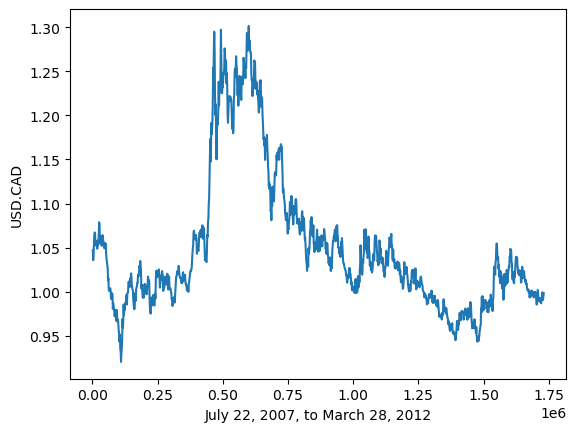

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import VarianceRatio

df=pd.read_csv('inputData_USDCAD.csv')

y=df.loc[df['Time']==1659, 'Close']

plt.xlabel("July 22, 2007, to March 28, 2012")
plt.ylabel("USD.CAD")
plt.plot(y)

**FIGURE 2.2** USD.CAD Price Series

Variance ratio can be used to test whether a financial return series is a pure random walk or having some predictability.

In [2]:
vr = VarianceRatio(y, lags=100)
print(f"Null Hypothesis: {vr.null_hypothesis}")
print(f"Alternative Hypothesis: {vr.alternative_hypothesis}\n")
print(f"{vr.summary()}\n")
print(f"Critical Values: {vr.critical_values}")

Null Hypothesis: The process is a random walk.
Alternative Hypothesis: The process is not a random walk.

     Variance-Ratio Test Results     
Test Statistic                 -0.201
P-value                         0.841
Lags                              100
-------------------------------------

Computed with overlapping blocks (de-biased)

Critical Values: {'1%': -2.3263478740408408, '5%': -1.6448536269514729, '10%': -1.2815515655446004, '90%': 1.2815515655446004, '95%': 1.6448536269514722, '99%': 2.3263478740408408}


The possible explanation of above test is as following (from E.P. Chan's book): test statistics equals to 1 means rejection of the random walk and test statistics equals to 0 means it may be a random walk. The p-value gives the smallest probability that you can reject the null hypothesis, which is a random walk. So in this case, we can not reject the null hypothesis.

Again, let's see perform Variance Ratio Test for stablecoin DAI/USD from Gemini exchange.

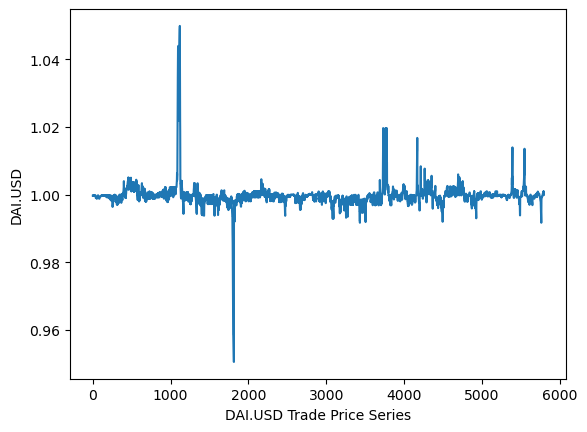

In [3]:
df2 = pd.read_hdf('inputData_DAIUSD.h5')

y2 = df2['price']

plt.xlabel("DAI.USD Trade Price Series")
plt.ylabel("DAI.USD")
plt.plot(y2)

In [4]:
vr = VarianceRatio(y2, lags=100)
print(f"Null Hypothesis: {vr.null_hypothesis}")
print(f"Alternative Hypothesis: {vr.alternative_hypothesis}\n")
print(f"{vr.summary()}\n")
print(f"Critical Values: {vr.critical_values}")

Null Hypothesis: The process is a random walk.
Alternative Hypothesis: The process is not a random walk.

     Variance-Ratio Test Results     
Test Statistic                 -2.870
P-value                         0.004
Lags                              100
-------------------------------------

Computed with overlapping blocks (de-biased)

Critical Values: {'1%': -2.3263478740408408, '5%': -1.6448536269514729, '10%': -1.2815515655446004, '90%': 1.2815515655446004, '95%': 1.6448536269514722, '99%': 2.3263478740408408}


The test statistic measures the strength of evidence against the null hypothesis of a random walk in the time series. In this case, the test statistic is -2.870.

The p-value represents the probability of observing a test statistic as extreme as or more extreme than the observed value, assuming the null hypothesis is true. In your case, the p-value is 0.004, which is below the significance level of 0.05. This suggests strong evidence against the null hypothesis and indicates the presence of some predictability or non-randomness in the time series.

The critical values provide thresholds for comparison with the test statistic. If the test statistic falls outside the range defined by the critical values, it provides further evidence against the null hypothesis. In your results, the critical values at different significance levels are provided.

Based on the given information, it appears that the Variance Ratio Test suggests evidence against the null hypothesis of a random walk in the time series. The small p-value indicates that the observed test statistic is unlikely to occur under the assumption of a random walk. The negative test statistic suggests some degree of mean reversion or predictability in the series.